# Logistic Regression Practice with understanding of Metrics

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
B = "\033[1m"
R = "\033[0m"

In [4]:
import os
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'heart_disease.csv',
 'LogisticRegression Mertric & Practice.ipynb']

In [5]:
data = pd.read_csv('heart_disease.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


 - age - age in years
 - sex - (1 = male; 0 = female)
 - cp - chest pain type
 - trestbps - resting blood pressure (in mm Hg on admission to the hospital)
 - chol - serum cholestoral in mg/dl
 - fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 - restecg - resting electrocardiographic results
 - thalach - maximum heart rate achieved
 - exang - exercise induced angina (1 = yes; 0 = no)
 - oldpeak - ST depression induced by exercise relative to rest
 - slope - the slope of the peak exercise ST segment
 - ca - number of major vessels (0-3) colored by flourosopy
 - thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
 - target - have disease or not (1=yes, 0=no)

In [9]:
print(f"Minimum Age found : {min(data['age'])}")
print(f"Maximum Age found : {max(data['age'])}")
data['sex'].unique().tolist()

Minimum Age found : 29
Maximum Age found : 77


[1, 0]

In [10]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['figure.facecolor'] = '#FFF'

<Axes: >

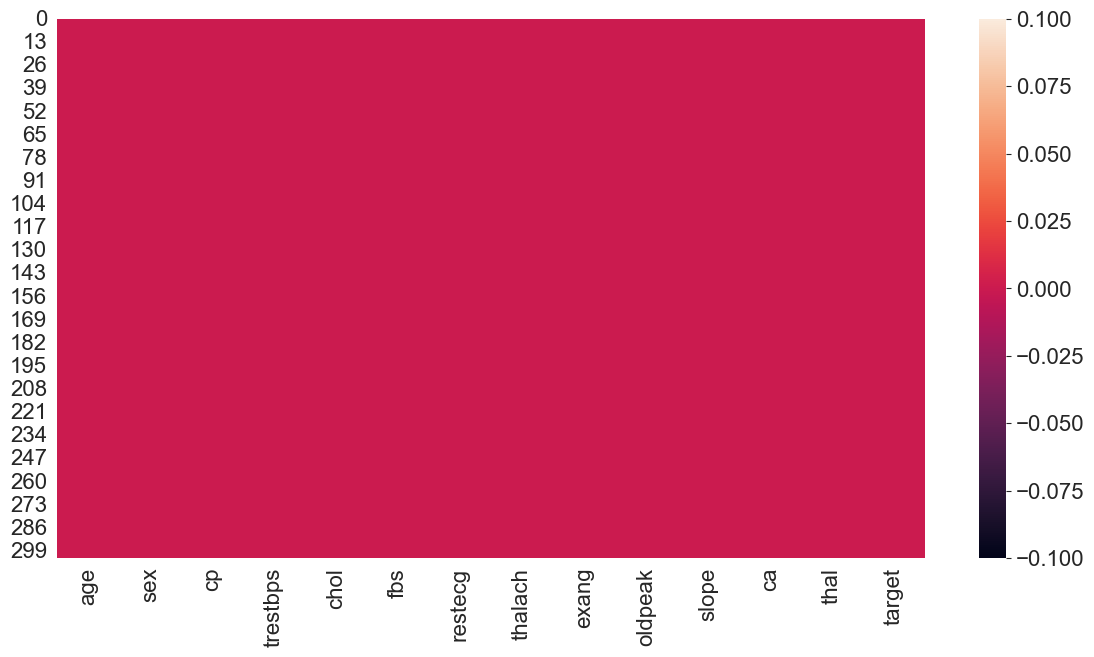

In [14]:
sns.heatmap(data.isnull())

In [12]:
df = pd.DataFrame(data)

Text(0, 0.5, 'Count')

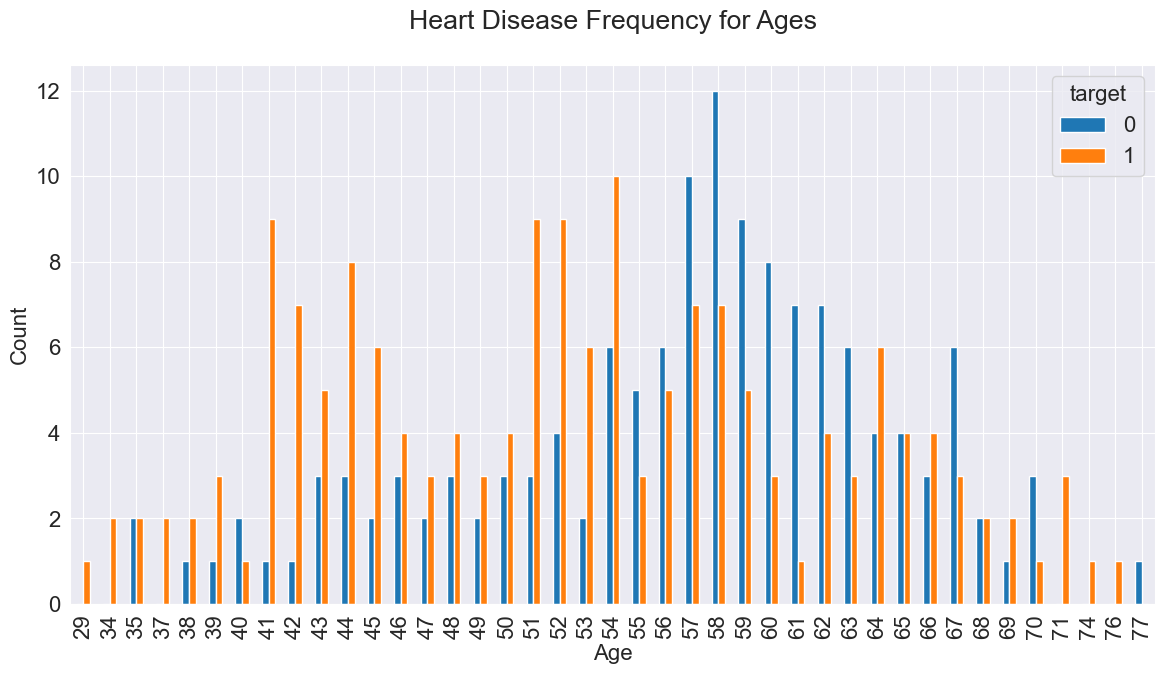

In [13]:
pd.crosstab(df['age'], df['target']).plot(kind = 'bar')
plt.title("Heart Disease Frequency for Ages\n")
plt.xlabel("Age")
plt.ylabel("Count")

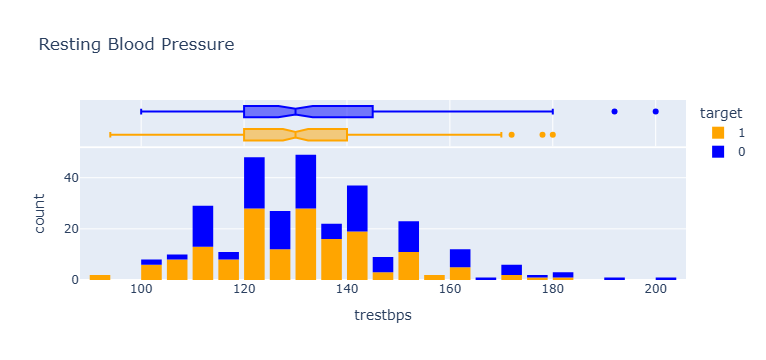

In [17]:
fig = ex.histogram(
    df,
    x="trestbps",
    color="target",
    marginal='box',
    color_discrete_sequence=['orange','blue'],
    title="Resting Blood Pressure"
)
fig.update_layout(bargap=0.2)

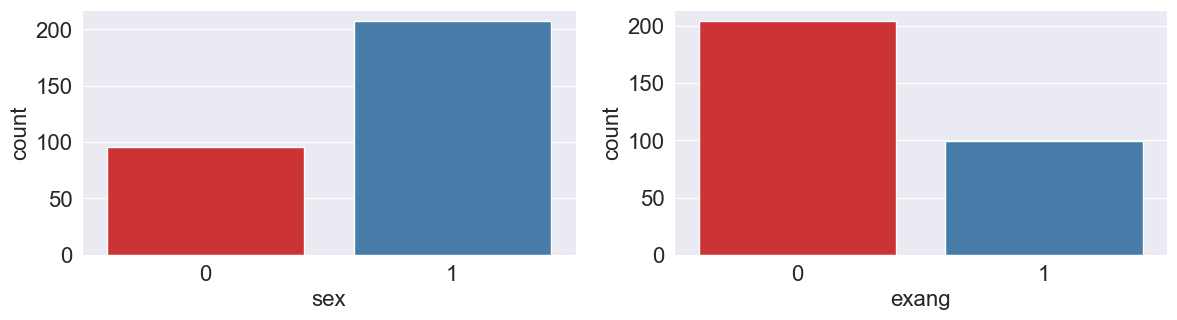

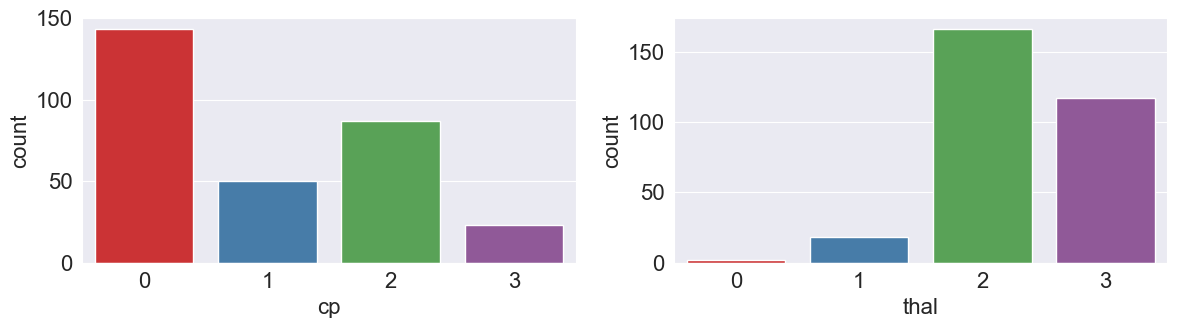

In [38]:
plt.subplot(2, 2, 1)
sns.countplot(data = df, x = 'sex', palette = 'Set1')
plt.subplot(2, 2, 2)
sns.countplot(data = df, x = 'exang', palette = 'Set1')
plt.show()

plt.subplot(2, 2, 3)
sns.countplot(data = df, x = 'cp', palette = 'Set1')
plt.subplot(2, 2, 4)
sns.countplot(data = df, x = 'thal', palette = 'Set1')
plt.show()

fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

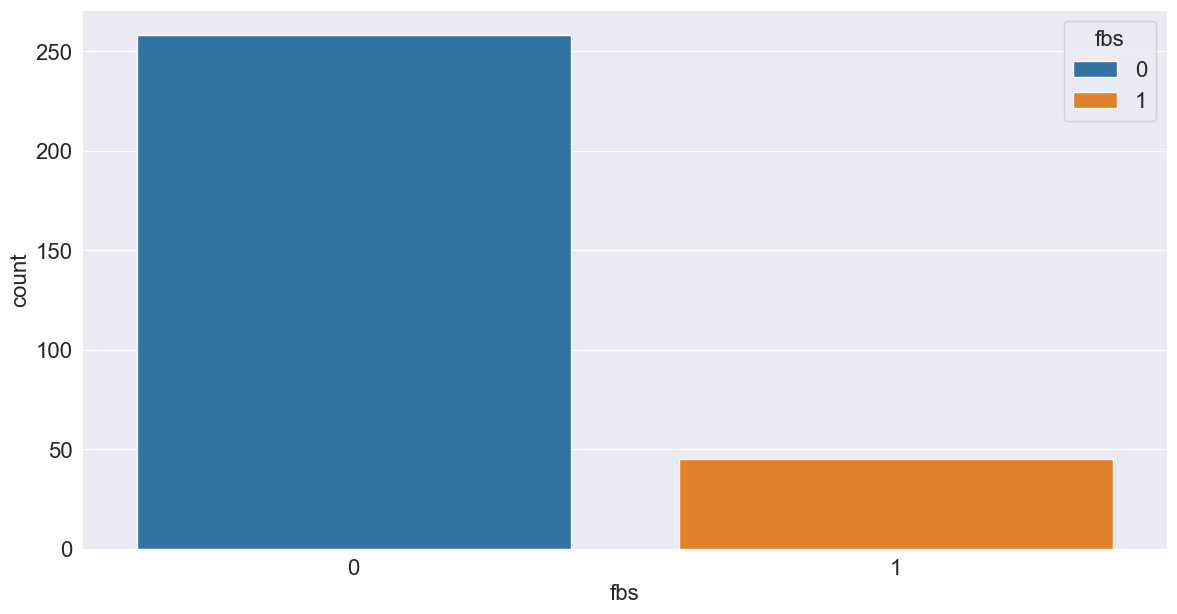

In [37]:
sns.countplot(data = df, x = 'fbs', hue = 'fbs')
plt.show()

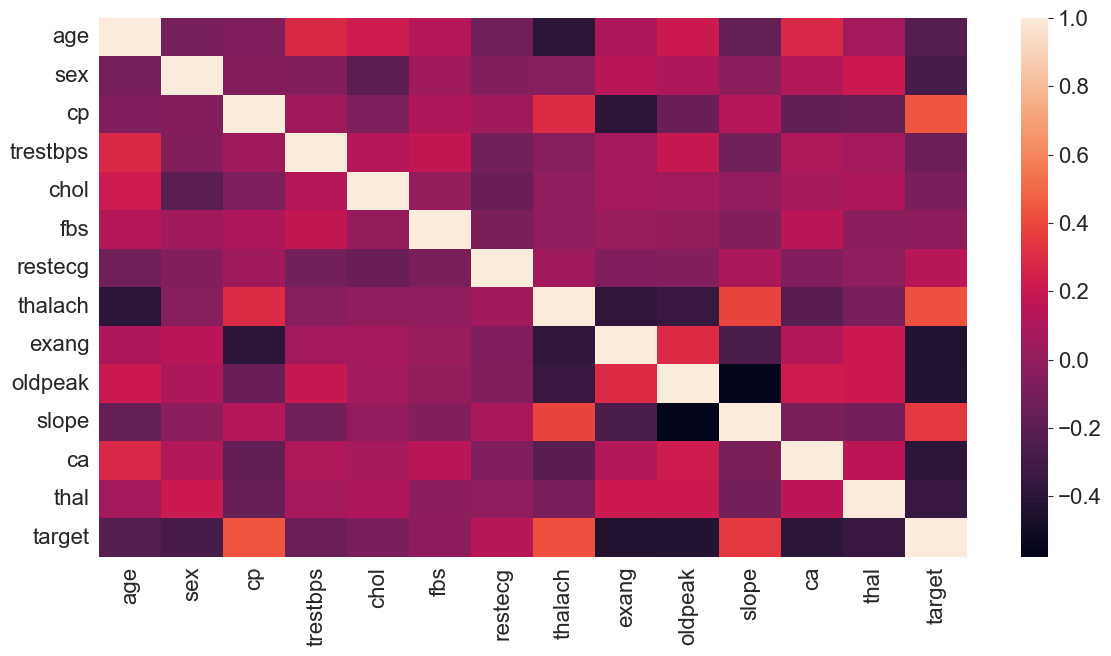

In [40]:
sns.heatmap(df.corr())
plt.show()

In [41]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [42]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64